# Введение

В этом задании Вам предстоит разобраться с основами анализа и прогнозирования временных рядов. 


![image](https://imgs.xkcd.com/comics/extrapolating.png)

In [ ]:
!pip install orbit-ml
!pip install prophet
!pip install sktime[all_extras]

In [ ]:
import pandas as pd
import numpy as np
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

## Задание 1 (2 балла). Поиск и предобработка данных.

В этом задании Вам необходимо _самостоятельно_ найти два временных ряда: один должен обладать месячной частотой, а второй — дневной.

Мы советуем поискать соответствующие временные ряды на платформе [kaggle](https://www.kaggle.com/datasets) или же взять один из [популярных](https://medium.com/analytics-vidhya/10-time-series-datasets-for-practice-d14fec9f21bc) временных рядов для анализа. 

**Не рекоммендуется** использовать в качестве временных рядов цены финансовых инструментов в силу плохой предсказуемости изменения цен. **Запрещается** использовать готовые наборы данных из библиотек для анализа временных рядов, например, `from orbit.utils.dataset import load_iclaims`.

![bitcoin](https://avatars.mds.yandex.net/get-zen_doc/3417386/pub_6017dd4b8d30cb1780864ae0_6017f4aa8d30cb1780bf66ce/scale_1200)




В качестве отчета по заданию:

* Опишите источники временных рядов (ссылки на страницы скачивания). В случае, если данные требовали дополнительной обработки, приведите код этой обработки, загрузите данные в личное облачное хранилище и приведите ссылку на скачивание. Процесс получения временных рядов должен быть **четко** расписан и полностью **воспроизводиться**. 

* Приведите код считывания временных рядов из файлов и разделения на train/test. Соотношение размеров train/test на Ваше усмотрение, но мы советуем Вам выбрать 80% на 20%, если в test остаётся хотя бы пара лет наблюдений.



https://www.kaggle.com/piyushagni5/monthly-sales-of-french-champagne

https://www.kaggle.com/ajohrn/bikeshare-usage-in-london-and-taipei-network

In [ ]:
# скачаем данные
!wget https://www.dropbox.com/s/geam9yc463bloor/monthly_champagne_sales.csv
!wget https://www.dropbox.com/s/if42jwbl2mf2y3j/london.csv

--2021-06-10 13:24:53--  https://www.dropbox.com/s/geam9yc463bloor/monthly_champagne_sales.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/geam9yc463bloor/monthly_champagne_sales.csv [following]
--2021-06-10 13:24:53--  https://www.dropbox.com/s/raw/geam9yc463bloor/monthly_champagne_sales.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc12d395e8ad0bf75c7e62ef0607.dl.dropboxusercontent.com/cd/0/inline/BQJvw5v_dHRwVYMU_01Nyc5J9PnlAi_NFoI08DIzITwa8h3IH49XqL3qLjJN-Ff9hXWkJK2rZumyuv9tj1ZN0TQ_Ce_1QXfhQh9o9emSpwYCqDko9DzXe30wCspZQpiElIt2BbnJFbNptUjm78wZ6jMs/file# [following]
--2021-06-10 13:24:54--  https://uc12d395e8ad0bf75c7e62ef0607.dl.dropboxusercontent.com/cd/0/inline/BQJvw5v_dHRwVYMU_01Nyc5J9PnlAi_NFoI08DIzITwa8

In [ ]:
# считаем файлы
ts1 = pd.read_csv('monthly_champagne_sales.csv')
ts2 = pd.read_csv('london.csv')

In [ ]:
ts1['Month'] = pd.to_datetime(ts1['Month'], format = '%Y-%m')

In [ ]:
ts1.set_index('Month', inplace = True)

In [ ]:
ts1.index = ts1.index.to_period("M")

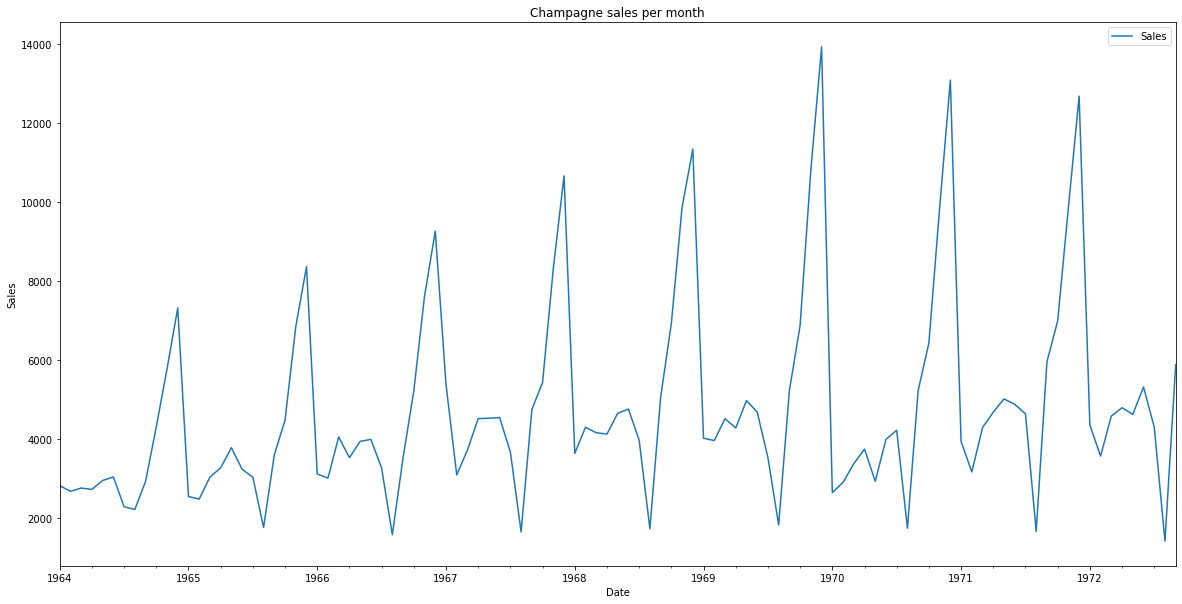

In [ ]:
fig, ax = plt.subplots(1, figsize = (20, 10))

ts1.plot(ax = ax)
ax.set(title = 'Champagne sales per month', xlabel = 'Date', ylabel = 'Sales')

plt.show()

Прологарифмируем ряд.

In [ ]:
ts1 = ts1.apply(np.log)

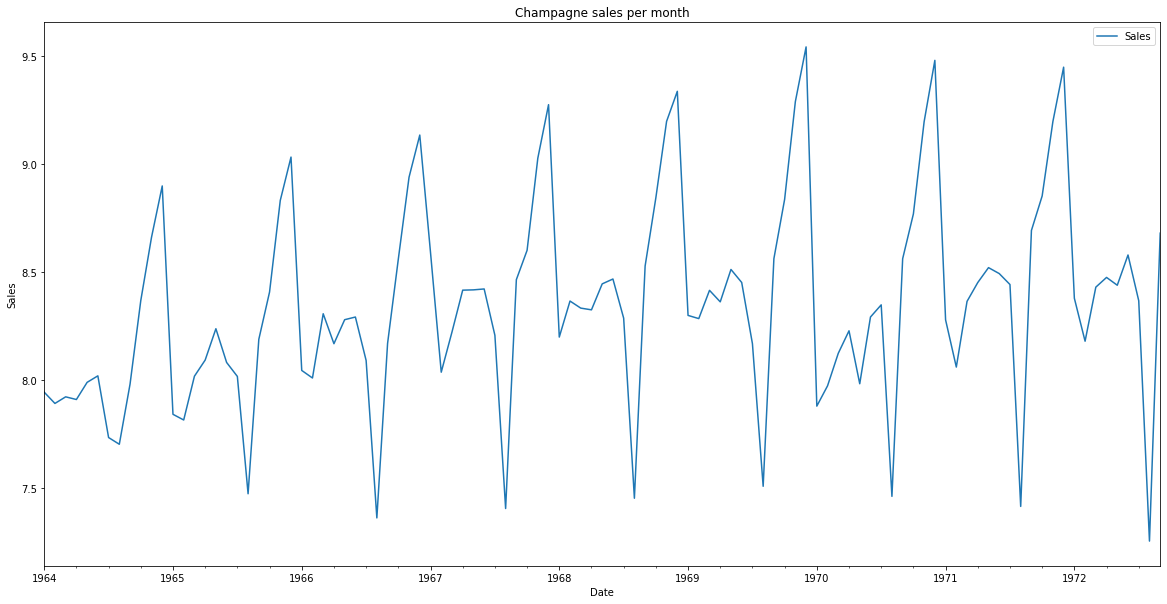

In [ ]:
fig, ax = plt.subplots(1, figsize = (20, 10))

ts1.plot(ax = ax)
ax.set(title = 'Champagne sales per month', xlabel = 'Date', ylabel = 'Sales')

plt.show()

Визуализируем сезонность.

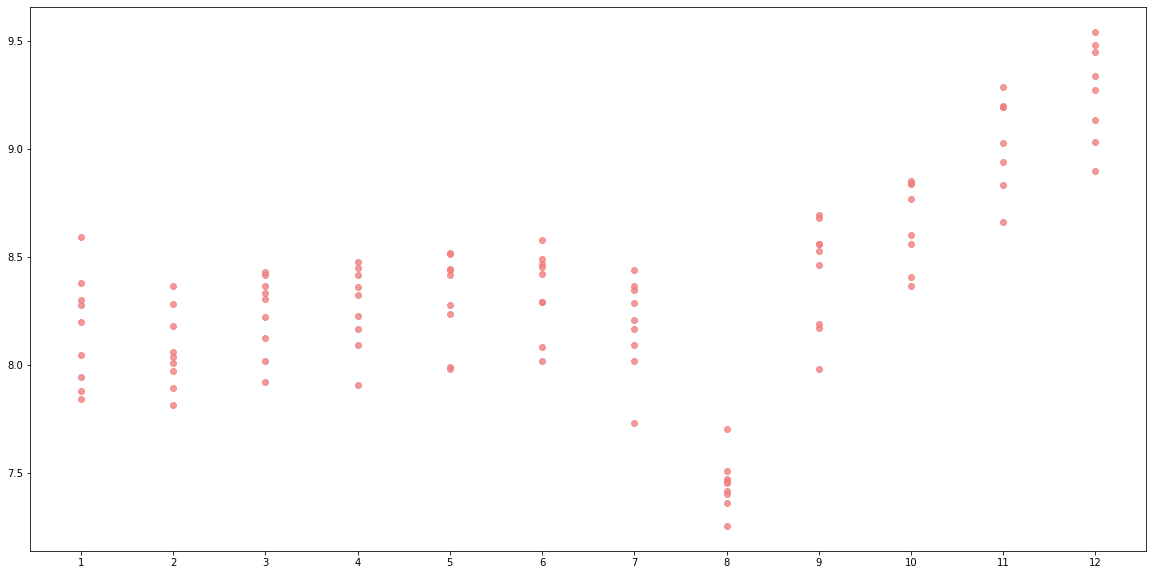

In [ ]:
fig, ax = plt.subplots(1, figsize = (20, 10))

ax.plot(ts1.index.month, ts1.Sales, 'o', color = 'lightcoral', alpha = .8)
ax.set_xticks([i for i in range(1, 13)])

plt.show()

In [ ]:
ts1_train = ts1.iloc[0:int(0.8 * ts1.shape[0]), :]
ts1_test = ts1.iloc[int(0.8 * ts1.shape[0]):, :]

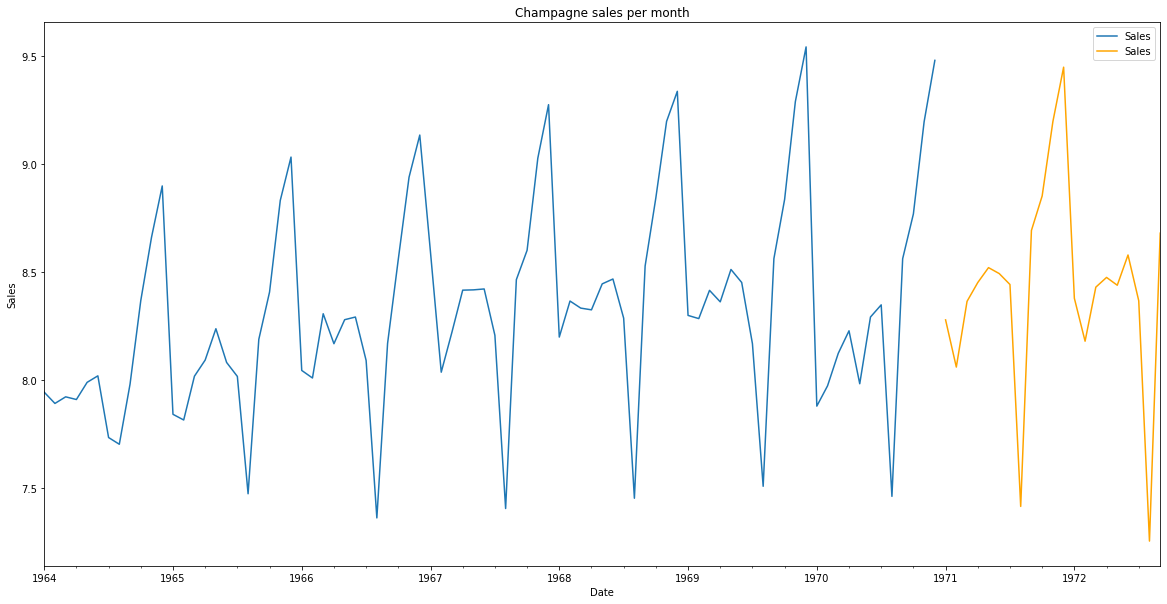

In [ ]:
fig, ax = plt.subplots(1, figsize = (20, 10))

ts1_train.plot(ax = ax)
ts1_test.plot(ax = ax, color = 'orange')
ax.set(title = 'Champagne sales per month', xlabel = 'Date', ylabel = 'Sales')

plt.show()

In [ ]:
ts2['start_rental_date_time'] = pd.to_datetime(ts2['start_rental_date_time'])
ts2['rental_day'] = ts2['start_rental_date_time'].dt.date
ts2 = ts2.groupby('rental_day').agg({'rental_id' : 'count'})
ts2 = ts2.reset_index().sort_values('rental_day')
ts2.rename(columns = {'rental_day' : 'date', 'rental_id' : 'rentals'}, inplace = True)
ts2 = ts2.set_index('date').asfreq('D')

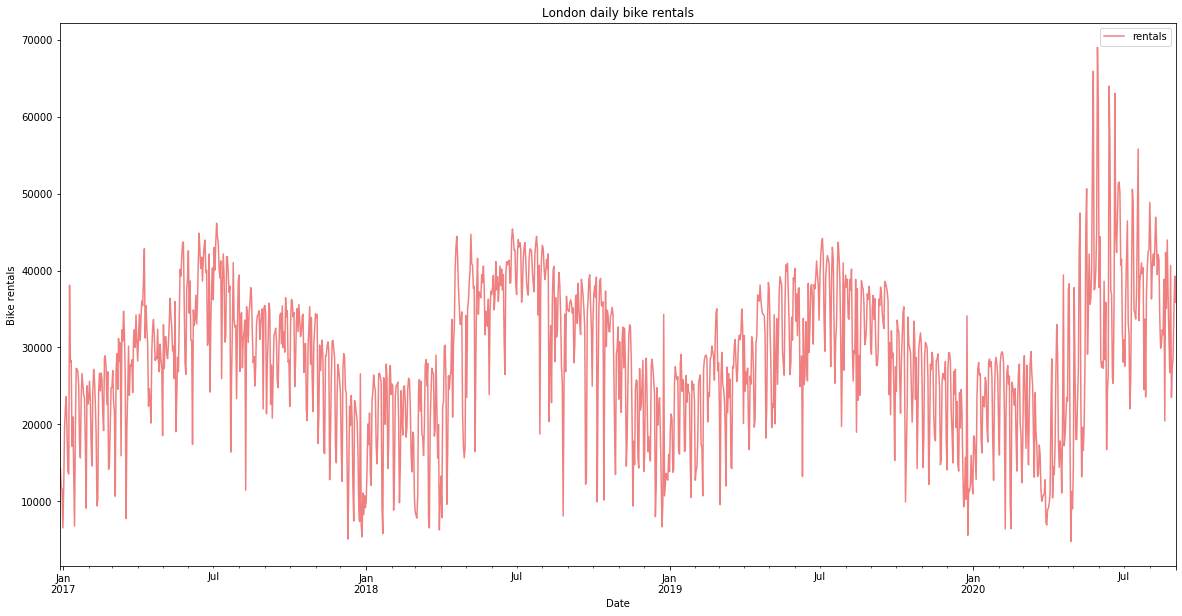

In [ ]:
fig, ax = plt.subplots(1, figsize = (20, 10))

ts2.plot(ax = ax, color = 'lightcoral')
ax.set(title = 'London daily bike rentals', xlabel = 'Date', ylabel = 'Bike rentals')

plt.show()

Уберем месяцы с короновирусом из нашей выборки, чтобы предсказания были точнее.

In [ ]:
ts2 = ts2.loc[ts2.index < '2020-05-01', :]

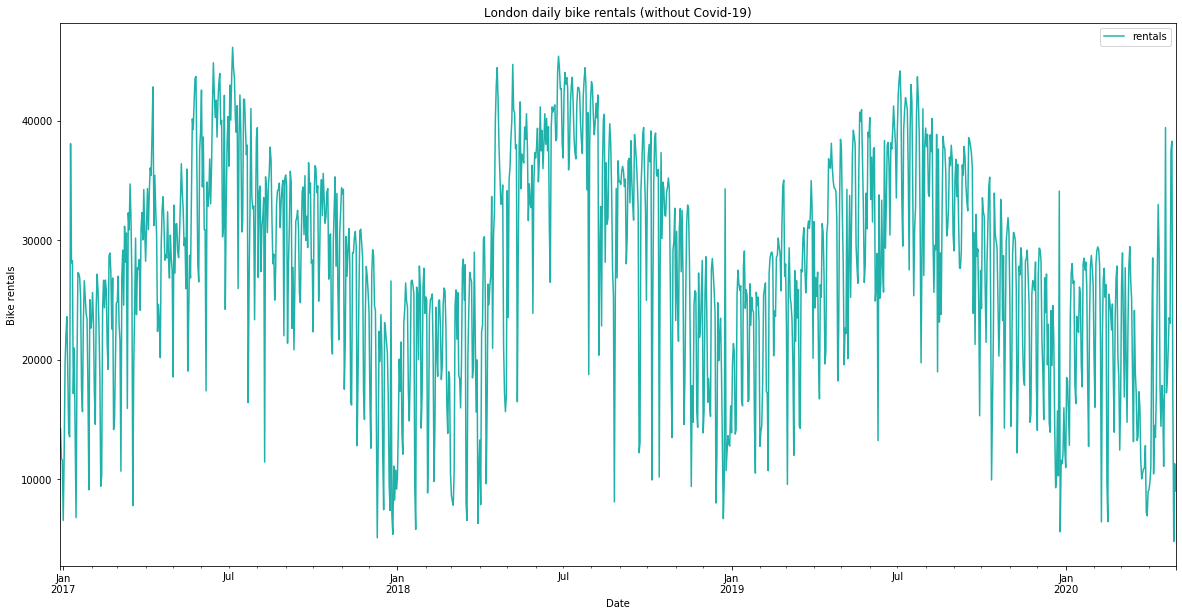

In [ ]:
fig, ax = plt.subplots(1, figsize = (20, 10))

ts2.plot(ax = ax, color = 'lightseagreen')
ax.set(title = 'London daily bike rentals (without Covid-19)', xlabel = 'Date', ylabel = 'Bike rentals')

plt.show()

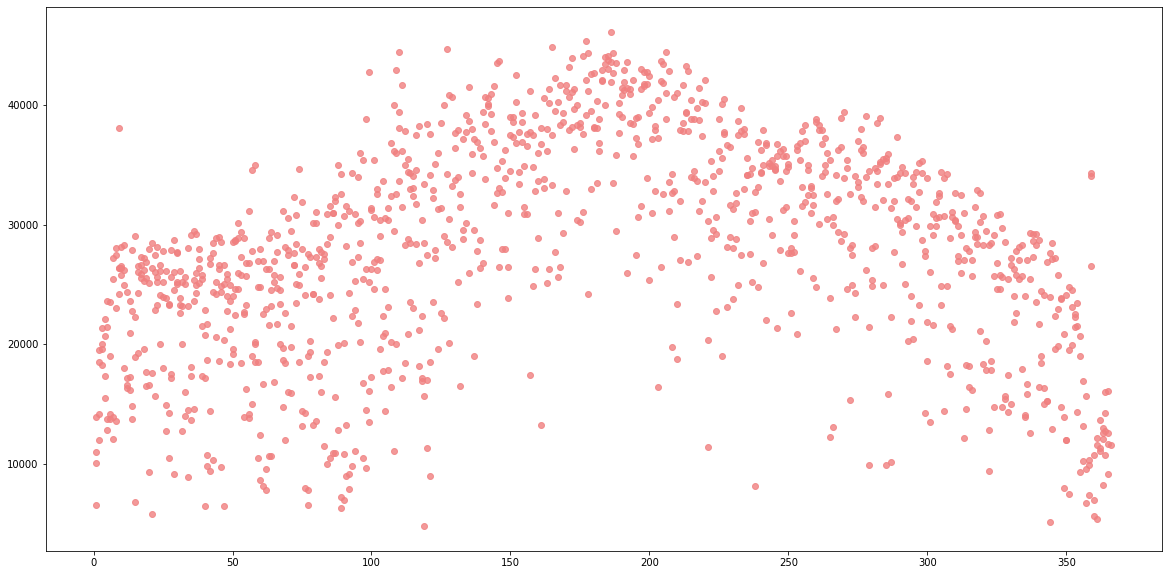

In [ ]:
fig, ax = plt.subplots(1, figsize = (20, 10))

ax.plot(ts2.index.dayofyear, ts2.rentals, 'o', color = 'lightcoral', alpha = .8)

plt.show()

In [ ]:
ts2_train = ts2.iloc[0:int(0.8 * ts2.shape[0]), :]
ts2_test = ts2.iloc[int(0.8 * ts2.shape[0]):, :]

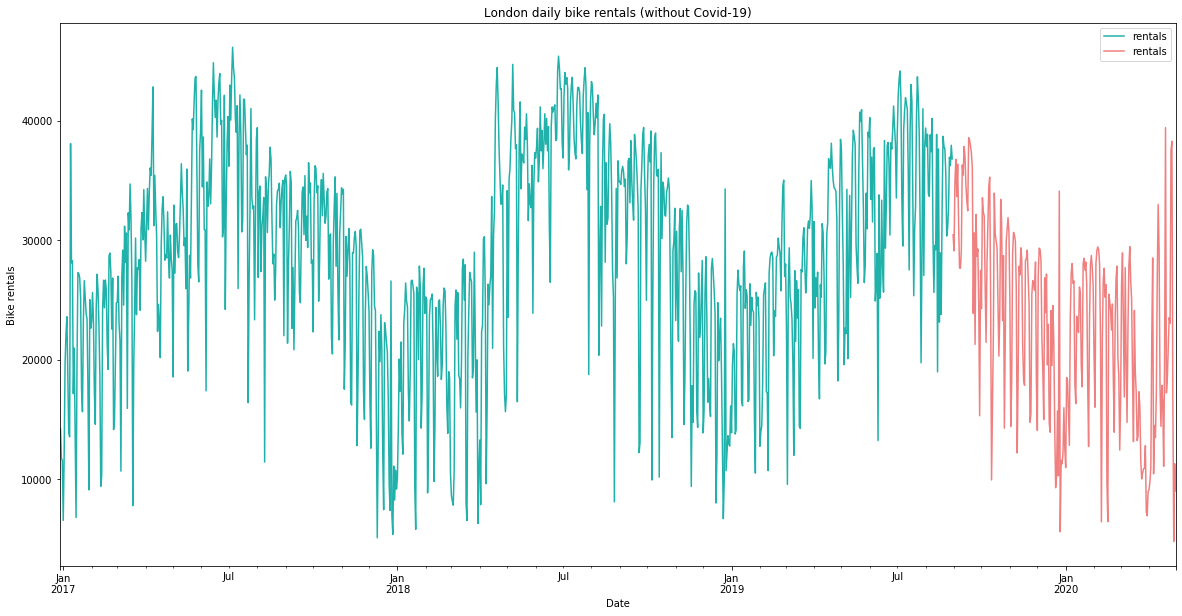

In [ ]:
fig, ax = plt.subplots(1, figsize = (20, 10))

ts2_train.plot(ax = ax, color = 'lightseagreen')
ts2_test.plot(ax = ax, color = 'lightcoral')
ax.set(title = 'London daily bike rentals (without Covid-19)', xlabel = 'Date', ylabel = 'Bike rentals')

plt.show()

## Задание 2. Анализ временных рядов (1 балла).

* Отрисуйте временные ряды и визуально сделайте различимым разбиение на выборки — либо вертикальной чертой, либо разными цветами.
  * Временные ряды я уже отрисовал!

* Постройте графики автокорреляционных функций для выбранных временных рядов. Прокомментируйте их: являются ли временные ряды сезонными? Видна ли на графиках длина сезонной составляющей ряда?

* В случае присутствия сезонности, разбейте временной ряд на повторяющиеся фрагменты и нарисуйте их наложенными для иллюстрации этой сезонности.

#### Первый датасет
На графике видна годовая сезонность.

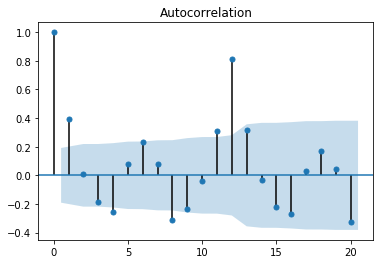

In [ ]:
from statsmodels.graphics import tsaplots

fig = tsaplots.plot_acf(ts1["Sales"], lags=20)
plt.show()

#### Второй датасет

Здесь видна как договая, так и отрицательная полугодовая сезонность из-за разницы между зимой и летом.

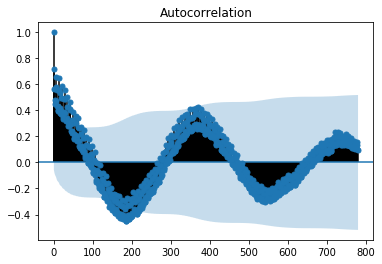

In [ ]:
from statsmodels.graphics import tsaplots

fig = tsaplots.plot_acf(ts2["rentals"], lags=730 + 50)
plt.show()

Здесь видна еще и недельная сезонность. Это пригодится нам для обучения `KTRLite`-модели.

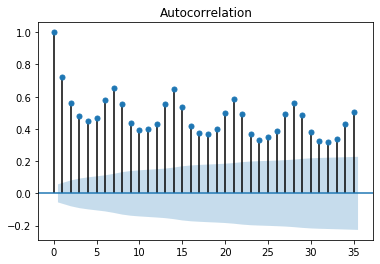

In [ ]:
from statsmodels.graphics import tsaplots

fig = tsaplots.plot_acf(ts2["rentals"], lags=7 * 5)
plt.show()

## Задание 3. Предсказание месячного временного ряда (4.5 балла).

В этом задании Вам предстоит попробовать предсказать месячный временной несколькими готовыми моделями со скользящим или растущим окном и выбрать среди них наилучшую.

В качестве метрики сравнения используйте MAE между истинными и предсказанными значениями ряда на тестовом отрезке.


### NaiveForecaster из sktime (0.5 балл).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

In [ ]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import MeanAbsoluteError

mae = MeanAbsoluteError() # y_true, y_pred

#### №1

In [ ]:
nfc = NaiveForecaster(strategy='last')
nfc.fit(ts1_train['Sales'])

NaiveForecaster()

In [ ]:
fh = ForecastingHorizon(ts1_test.index, is_relative=False)

In [ ]:
def plot_fc(y_train, y_test, fc):

  err = np.round(mae(y_test, fc), 2)

  fig, ax = plt.subplots(1, figsize = (20, 10))

  y_train.plot(ax = ax, color = 'cornflowerblue', label = 'Train', linewidth = 1.7)
  y_test.plot(ax = ax, color = 'sandybrown', label = 'Test', linewidth = 1.7)
  fc.plot(ax = ax, color = 'mediumseagreen', linestyle = 'dashed', label = 'Forecast', linewidth = 1.7)

  ax.set(title = '', xlabel = 'Date', ylabel = 'Value')
  ax.text(0.013, 0.95, f'MAE: {err}', fontsize = 24, horizontalalignment='left', verticalalignment='center', transform = ax.transAxes)

  plt.legend()
  plt.show()

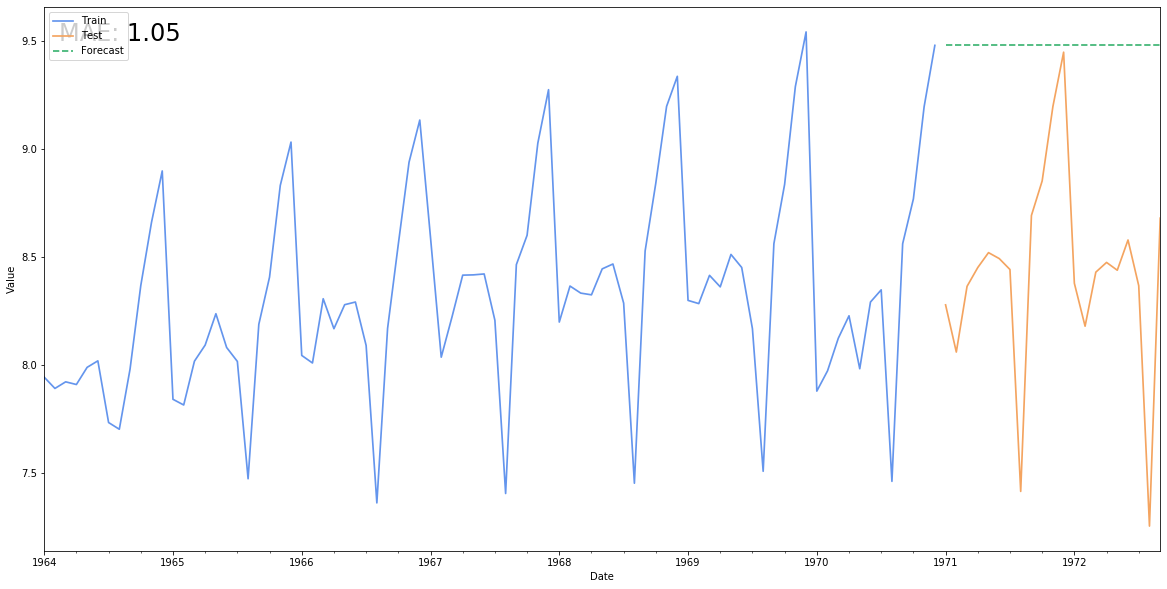

In [ ]:
plot_fc(ts1_train['Sales'], ts1_test['Sales'], nfc.predict(fh))

#### №2

In [ ]:
nfc = NaiveForecaster(strategy='last', sp = 12)
nfc.fit(ts1_train['Sales'])
fh = ForecastingHorizon(ts1_test.index, is_relative=False)

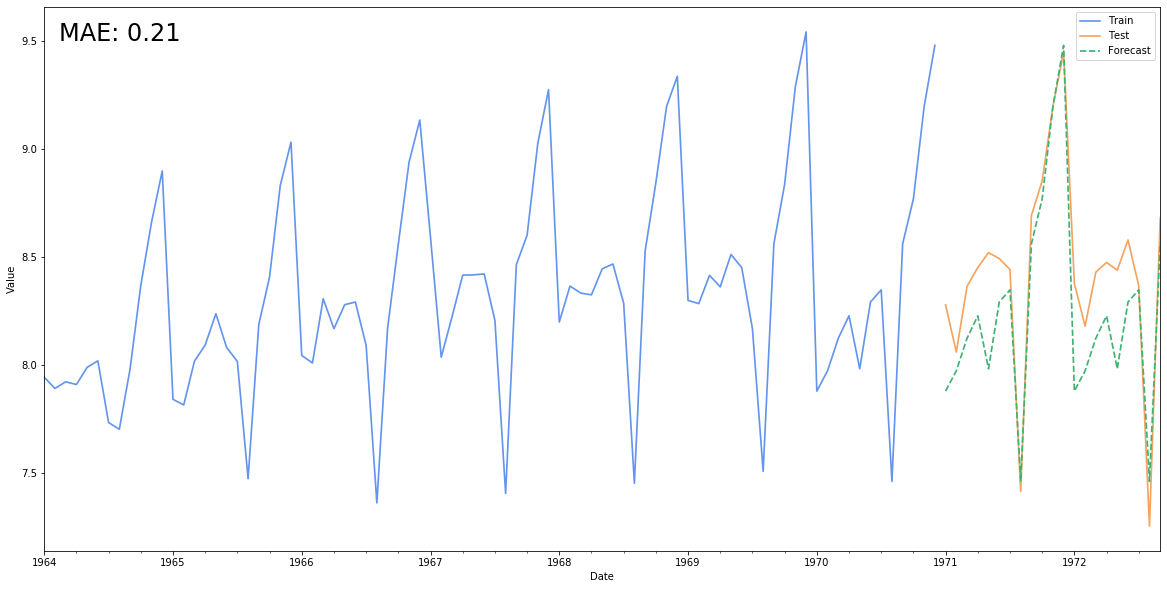

In [ ]:
plot_fc(ts1_train['Sales'], ts1_test['Sales'], nfc.predict(fh))

### ARIMA/AutoArima (1 балл).

Обучите из библиотеки `sktime` модели:

* SARIMA(1, 1, 1)(1, 0, 0)[12] (`ARIMA` в `sktime`)
* Алгоритм Хиндмана-Хандакара подбора SARIMA (`AutoARIMA` в `sktime`)



In [ ]:
from sktime.forecasting.arima import ARIMA, AutoARIMA

#### ARIMA

In [ ]:
arima = ARIMA(order = (1, 1, 1), seasonal_order = (1, 0, 0, 12), suppress_warnings = True)
arima.fit(ts1_train['Sales'])
fh = ForecastingHorizon(ts1_test.index, is_relative=False)

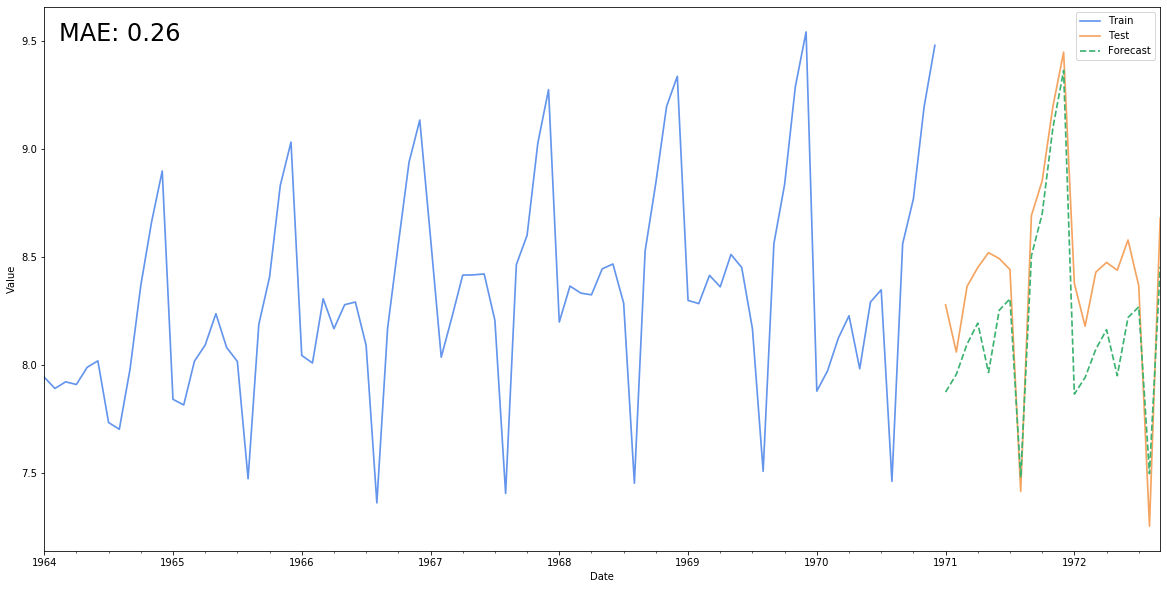

In [ ]:
plot_fc(ts1_train['Sales'], ts1_test['Sales'], arima.predict(fh))

#### Auto-ARIMA

In [ ]:
arima = AutoARIMA(sp = 12, suppress_warnings = True, information_criterion = 'aic', scoring = 'mae')
arima.fit(ts1_train['Sales'])
fh = ForecastingHorizon(ts1_test.index, is_relative=False)

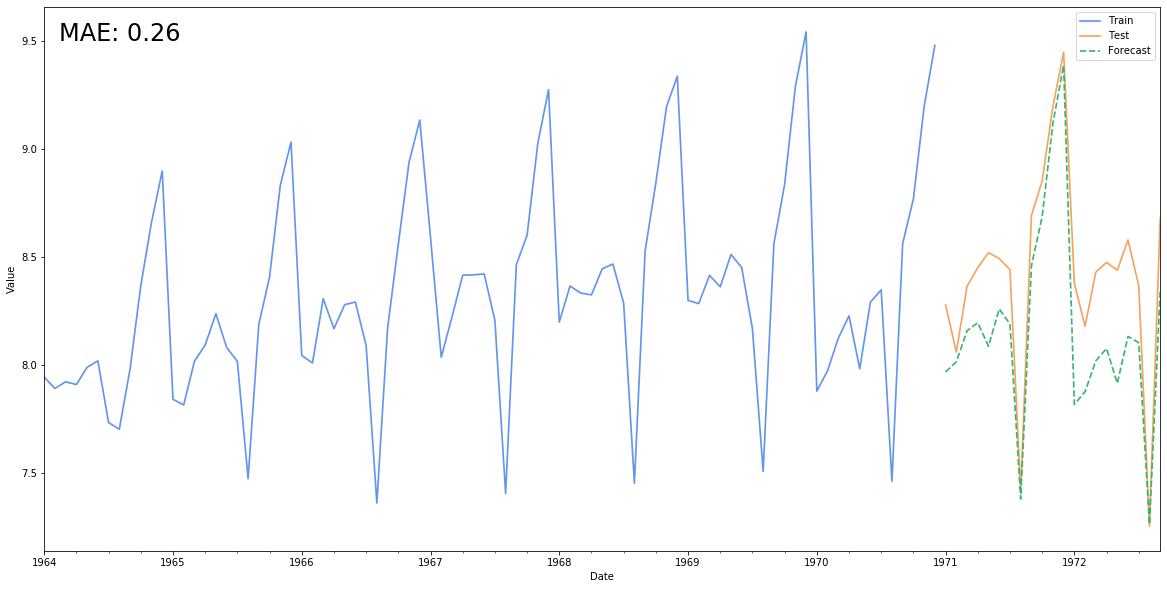

In [ ]:
plot_fc(ts1_train['Sales'], ts1_test['Sales'], arima.predict(fh))

### LGT/DLT (1 балл).

Обучите из библиотеки `orbit` модели LGT и DLT

In [ ]:
from orbit.models.lgt import LGTFull
from orbit.models.dlt import DLTFull
from orbit.diagnostics.plot import plot_predicted_data

#### LGT

In [ ]:
ts1_train_orbit = ts1_train.reset_index()
ts1_train_orbit['Month'] = ts1_train_orbit['Month'].dt.to_timestamp()

ts1_test_orbit = ts1_test.reset_index()
ts1_test_orbit['Month'] = ts1_test_orbit['Month'].dt.to_timestamp()

In [ ]:
lgt = LGTFull(
    response_col = 'Sales', 
    date_col = 'Month',
    seasonality = 12, seed = 123)

In [ ]:
lgt.fit(ts1_train_orbit)
predicted_df = lgt.predict(df = ts1_test_orbit)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_2af9ff5e07f97061bbe4badb0f8a2e36 NOW.


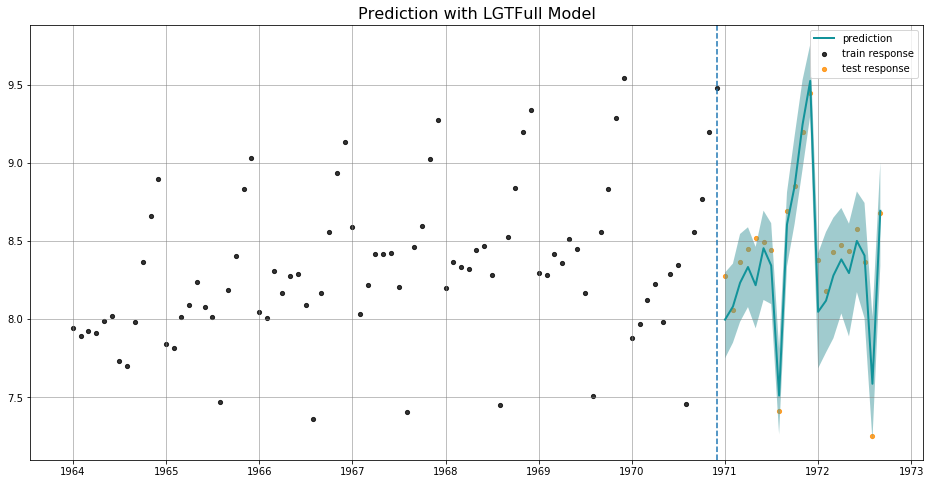

In [ ]:
_ = plot_predicted_data(training_actual_df = ts1_train_orbit, predicted_df = predicted_df,
                        date_col = lgt.date_col, actual_col = lgt.response_col,
                        test_actual_df = ts1_test_orbit, title = 'Prediction with LGTFull Model')

In [ ]:
print(f'MAE: {np.round(mae(ts1_test.Sales, predicted_df.prediction), 2)}')

MAE: 0.12


#### DLT

In [ ]:
dlt = DLTFull(
    response_col = 'Sales', 
    date_col = 'Month',
    seasonality = 12, seed = 123)

In [ ]:
dlt.fit(ts1_train_orbit)
predicted_df = dlt.predict(df = ts1_test_orbit)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_b0a449c7523386cce384e92a998e71c8 NOW.


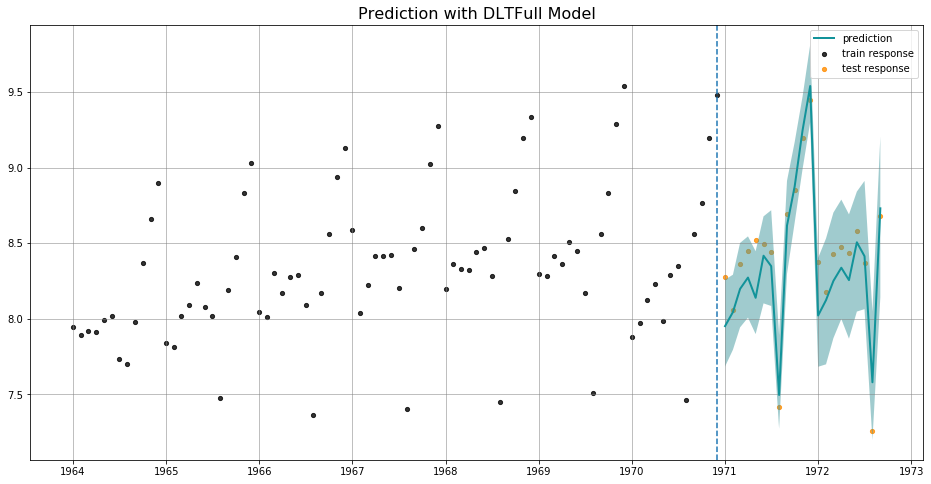

In [ ]:
_ = plot_predicted_data(training_actual_df = ts1_train_orbit, predicted_df = predicted_df,
                        date_col = lgt.date_col, actual_col = lgt.response_col,
                        test_actual_df = ts1_test_orbit, title = 'Prediction with DLTFull Model')

In [ ]:
print(f'MAE: {np.round(mae(ts1_test.Sales, predicted_df.prediction), 2)}')

MAE: 0.14


### ETS (2 балла).

Обучите из библиотеки `sklearn` модели:

* ETS(AAA) (`ExponentialSmoothing` в `sktime`)
* ETS с автоматическим выбором по AIC (`AutoETS` в `sktime`)

In [ ]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.ets import AutoETS

#### ETS(AAA)

In [ ]:
ets = ExponentialSmoothing(trend = 'add', seasonal = 'add', sp = 12)
ets.fit(ts1_train['Sales'])
fh = ForecastingHorizon(ts1_test.index, is_relative=False)

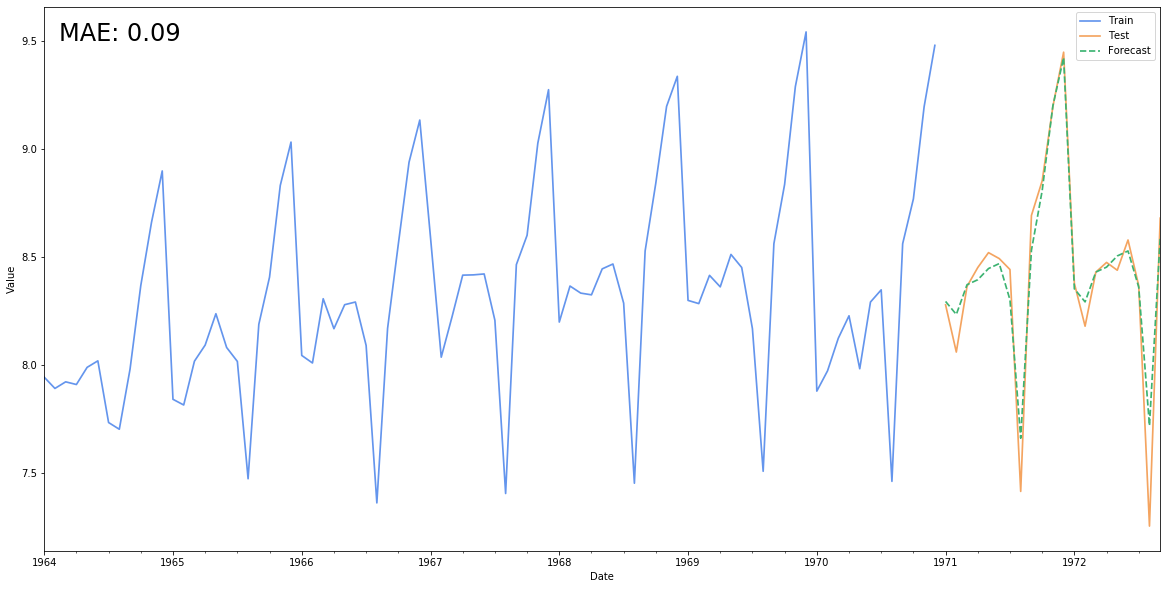

In [ ]:
plot_fc(ts1_train['Sales'], ts1_test['Sales'], ets.predict(fh))

#### AutoETS

In [ ]:
ets = AutoETS(auto = True, sp = 12)
ets.fit(ts1_train['Sales'])
fh = ForecastingHorizon(ts1_test.index, is_relative=False)

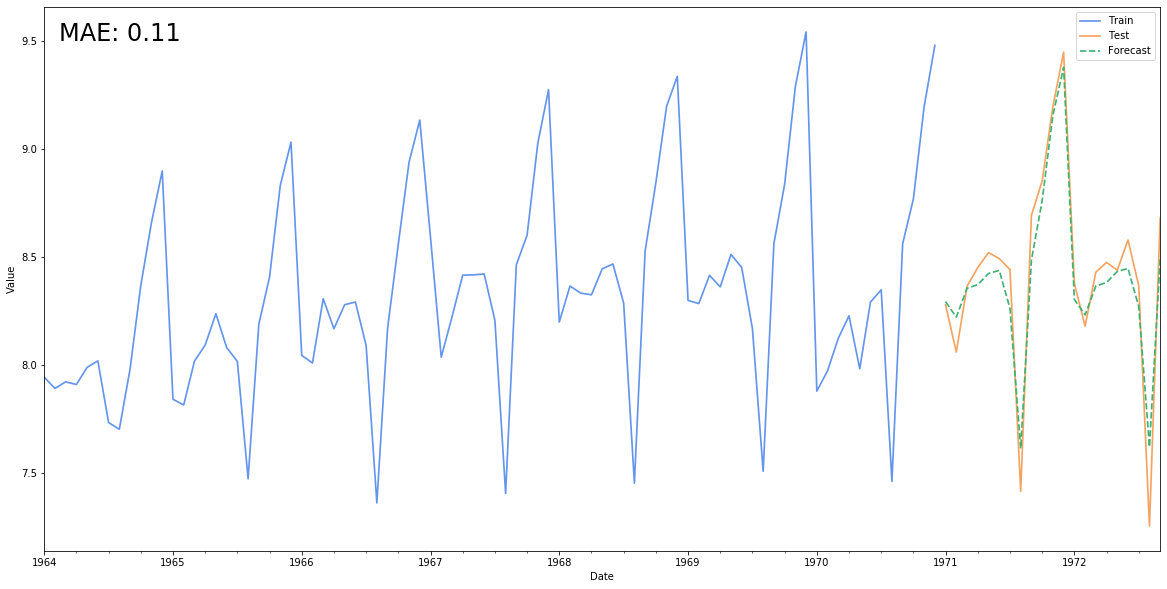

In [ ]:
plot_fc(ts1_train['Sales'], ts1_test['Sales'], ets.predict(fh))

Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения. В `sktime` `ETS` модель пока ещё не выдаёт доверительные интервалы, но при желании до них можно дотянуться :)

_Наилучшей моделью оказалась ETS(AAA)._

Доверительные интервалы посмотрим на этой же модели, которая лежит в другом пакете.

In [ ]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

In [ ]:
model = ETSModel(ts1_train['Sales'], 
                 error = "add", 
                 trend = "add", 
                 seasonal = "add", 
                 damped_trend=False, 
                 seasonal_periods=12)

fit = model.fit()

In [ ]:
pred = fit.get_prediction(start='1971-01', end='1972-09')
pred = pred.summary_frame(alpha=0.05)

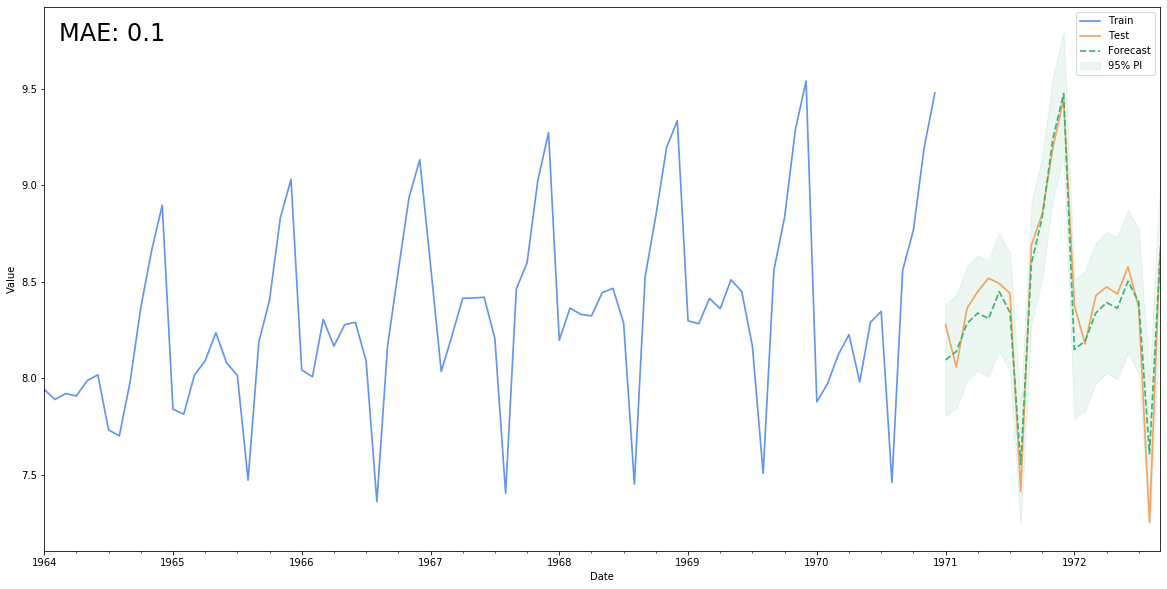

In [ ]:
  err = np.round(mae(ts1_test['Sales'], pred['mean']), 2)

  fig, ax = plt.subplots(1, figsize = (20, 10))

  ts1_train['Sales'].plot(ax = ax, color = 'cornflowerblue', label = 'Train', linewidth = 1.7)
  ts1_test['Sales'].plot(ax = ax, color = 'sandybrown', label = 'Test', linewidth = 1.7)
  pred['mean'].plot(ax = ax, color = 'mediumseagreen', linestyle = 'dashed', label = 'Forecast', linewidth = 1.7)
  ax.fill_between(pred.index, pred.pi_lower, pred.pi_upper, color='mediumseagreen', alpha=.1, label = '95% PI')

  ax.set(title = '', xlabel = 'Date', ylabel = 'Value')
  ax.text(0.013, 0.95, f'MAE: {err}', fontsize = 24, horizontalalignment='left', verticalalignment='center', transform = ax.transAxes)

  plt.legend()
  plt.show()

## Задание 4. Предсказание дневного временного ряда (2.5 балла).

В этом задании Вам предстоит попробовать предсказать выбранный Вами дневной временной ряд.

Аналогично, в качестве метрики используем MAE.



Для начала отнормируем данные.

In [ ]:
ts2_train_minmax = ts2_train.copy()
ts2_test_minmax = ts2_test.copy()

ts2_train_minmax['rentals'] = (ts2_train['rentals'] - np.min(ts2['rentals'])) / (np.max(ts2['rentals']) - np.min(ts2['rentals']))
ts2_test_minmax['rentals'] = (ts2_test['rentals'] - np.min(ts2['rentals'])) / (np.max(ts2['rentals']) - np.min(ts2['rentals']))

### NaiveForecaster из sktime (0.5 балла).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

#### №1

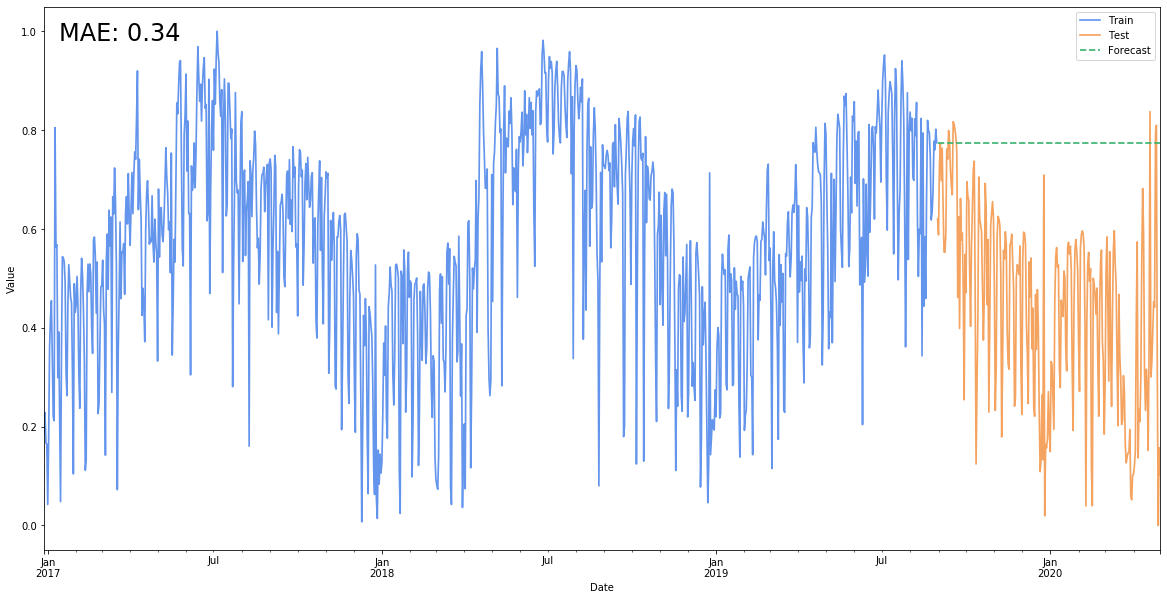

In [ ]:
nfc = NaiveForecaster(strategy='last')
nfc.fit(ts2_train_minmax['rentals'])

fh = ForecastingHorizon(ts2_test_minmax.index, is_relative=False)
plot_fc(ts2_train_minmax['rentals'], ts2_test_minmax['rentals'], nfc.predict(fh))

#### №2

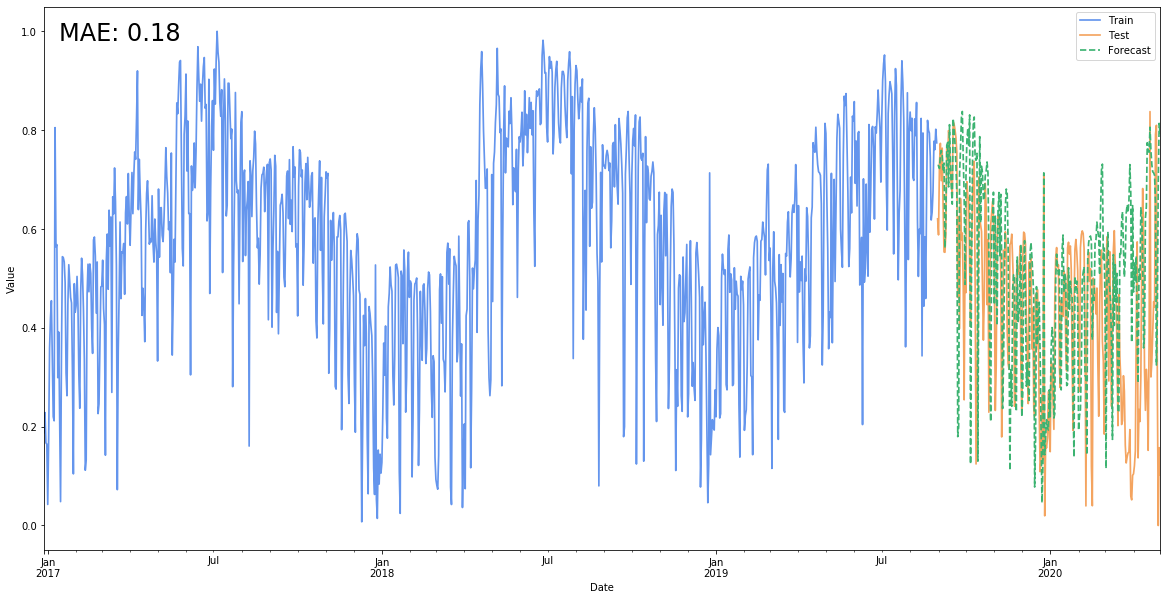

In [ ]:
nfc = NaiveForecaster(strategy='last', sp = 365)
nfc.fit(ts2_train_minmax['rentals'])

fh = ForecastingHorizon(ts2_test_minmax.index, is_relative=False)
plot_fc(ts2_train_minmax['rentals'], ts2_test_minmax['rentals'], nfc.predict(fh))

### KTR из orbit (1 балл).



In [ ]:
from orbit.models.ktrlite import KTRLiteMAP
from orbit.estimators.stan_estimator import StanEstimatorMCMC, StanEstimatorMAP
from orbit.diagnostics.plot import plot_predicted_components, plot_ktr_lev_knots

In [ ]:
ts2_train_orbit = ts2_train_minmax.reset_index()
ts2_test_orbit = ts2_test_minmax.reset_index()

In [ ]:
ktrlite = KTRLiteMAP(
    response_col='rentals',
    date_col='date',
    # Сезонность
    seasonality=[7, 365], # недельная и годовая
    seasonality_fs_order=[2, 1],
    level_knot_scale=.1,
    span_level=.05,
    span_coefficients=.3,
    estimator_type=StanEstimatorMAP
)

In [ ]:
ktrlite.fit(ts2_train_orbit)
predicted_df = ktrlite.predict(df = ts2_test_orbit, decompose = True)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_54eae5ecf2d426f33baa7b746b329122 NOW.


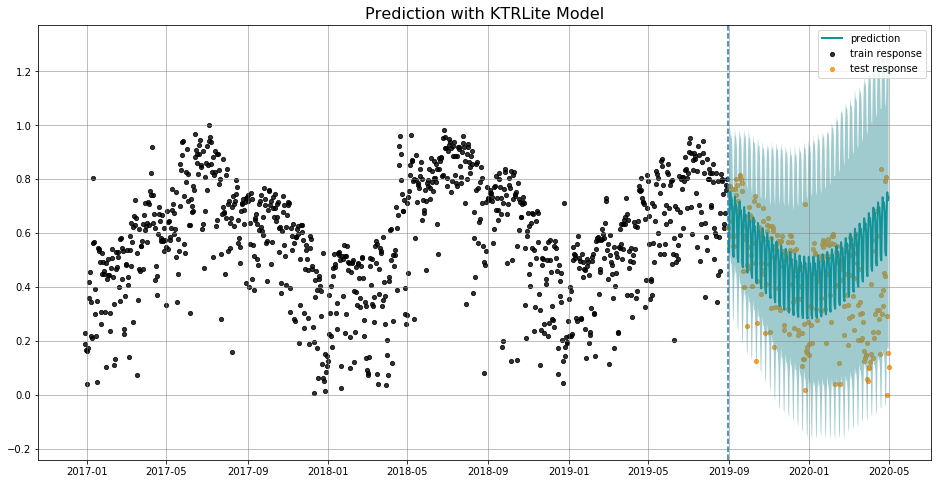

In [ ]:
_ = plot_predicted_data(training_actual_df = ts2_train_orbit, predicted_df = predicted_df,
                        date_col = ktrlite.date_col, actual_col = ktrlite.response_col,
                        test_actual_df = ts2_test_orbit, title = 'Prediction with KTRLite Model')

In [ ]:
print(f'MAE: {np.round(mae(ts2_test_orbit.rentals, predicted_df.prediction), 2)}')

MAE: 0.14


Посмотрим на тренд и недельную и годовую сезонность.

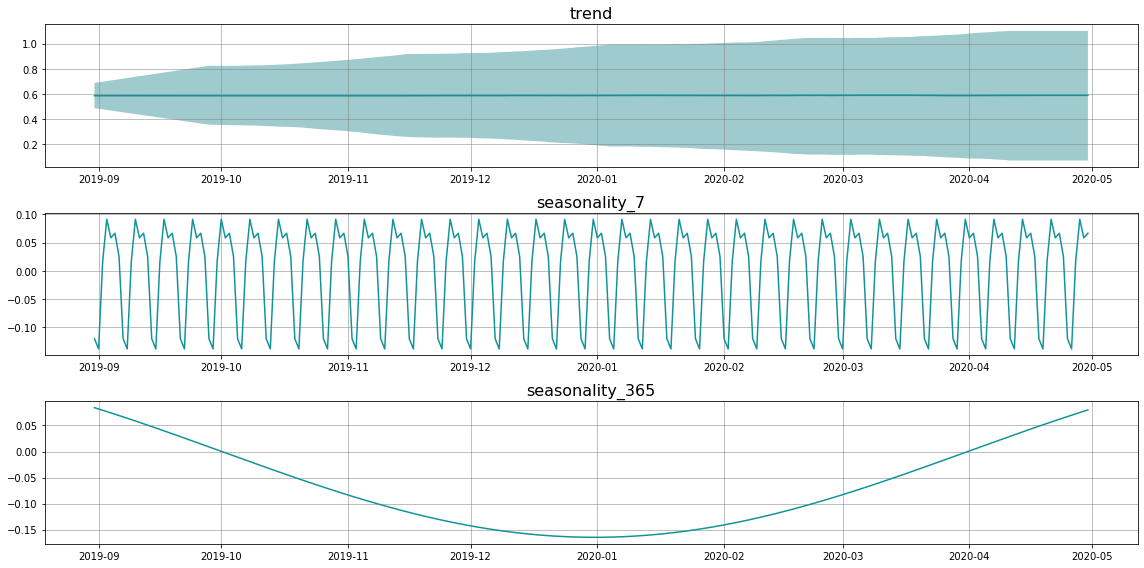

In [ ]:
_ = plot_predicted_components(predicted_df = predicted_df, date_col = 'date',
                              plot_components = ['trend', 'seasonality_7', 'seasonality_365'])

In [ ]:
lev_knots = ktrlite._aggregate_posteriors['map']['lev_knot']
lev_knot_dates = ktrlite._level_knot_dates
decomp_df = ktrlite.predict(df = ts2_train_orbit, decompose=True)

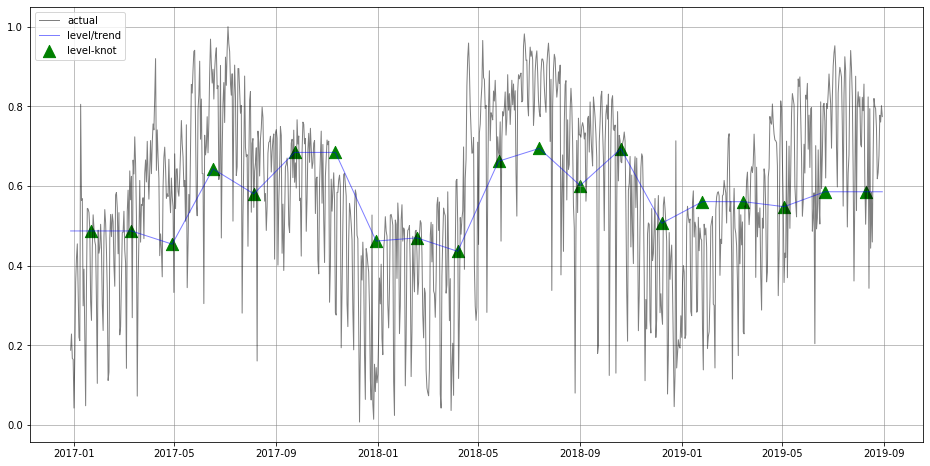

In [ ]:
_ = plot_ktr_lev_knots(ts2_train_orbit, decomp_df, 'date',
                       'rentals', lev_knot_dates, lev_knots)

### Phophet (1 балл).



In [ ]:
from prophet import Prophet

In [ ]:
ts2_train_prophet = ts2_train_orbit.rename(columns = {'date' : 'ds', 'rentals' : 'y'})
ts2_test_prophet = ts2_test_orbit.rename(columns = {'date' : 'ds', 'rentals' : 'y'})

In [ ]:
m = Prophet(growth = 'flat',        # говорим, что в данных нет глобального тренда

            yearly_seasonality = 1, # ограничиваем число годовых сезонных колебаний до 1 (исходя из вида данных и декомпозиции, полученной в Orbit). 
                                    # Плюс, это поможет избежать переобучения.
            holidays = None)
m.add_country_holidays(country_name='UK') # включаем праздники в UK
m.fit(ts2_train_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
for h in m.train_holiday_names:
  print(h)

New Year's Day
New Year Holiday [Scotland]
New Year Holiday [Scotland] (Observed)
St. Patrick's Day [Northern Ireland]
Battle of the Boyne [Northern Ireland]
Summer Bank Holiday [Scotland]
St. Andrew's Day [Scotland]
Christmas Day
Christmas Day (Observed)
Good Friday
Easter Monday [England
Wales
Northern Ireland]
May Day
Spring Bank Holiday
Late Summer Bank Holiday [England
Boxing Day
New Year's Day (Observed)
St. Patrick's Day [Northern Ireland] (Observed)


In [ ]:
future = ts2_test_prophet[['ds']]
forecast = m.predict(future)

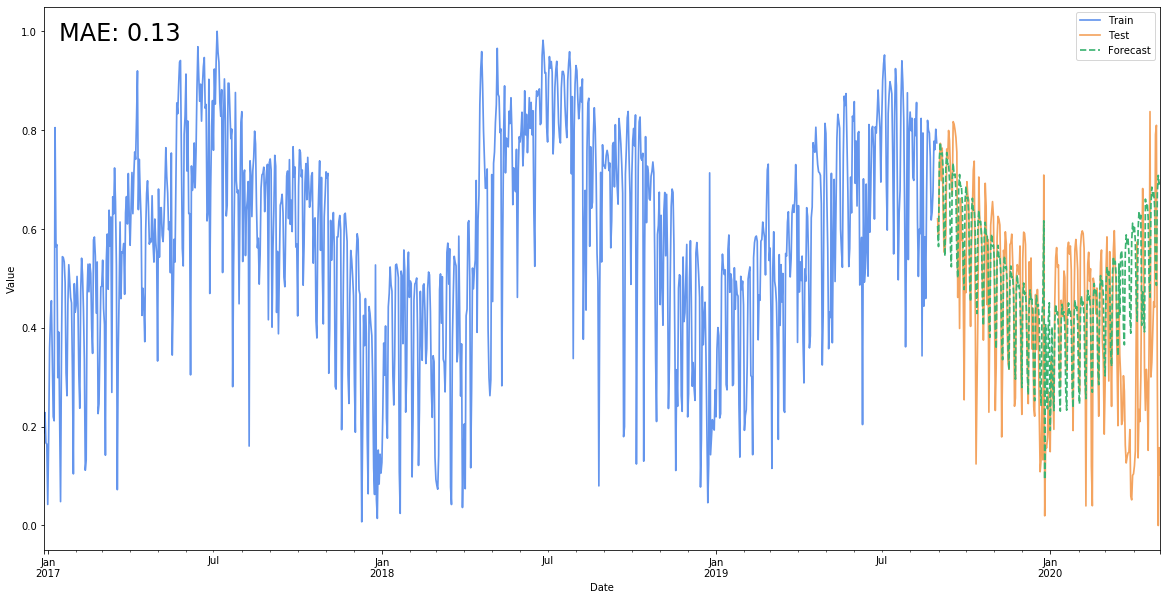

In [ ]:
plot_fc(ts2_train_minmax['rentals'], ts2_test_minmax['rentals'], forecast.set_index('ds')['yhat'])

Выведем те же самые параметры у этого предсказанного ряда.

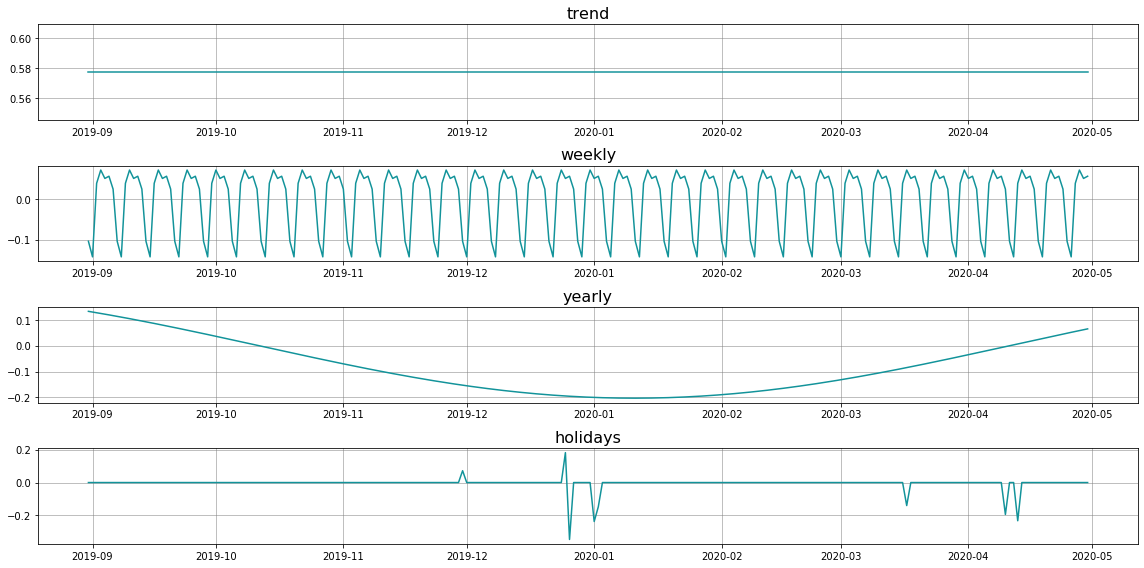

In [ ]:
_ = plot_predicted_components(predicted_df = forecast, date_col = 'ds',
                              plot_components = ['trend', 'weekly', 'yearly', 'holidays'])

Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения.

_Лучшей моделью оказался Prophet._

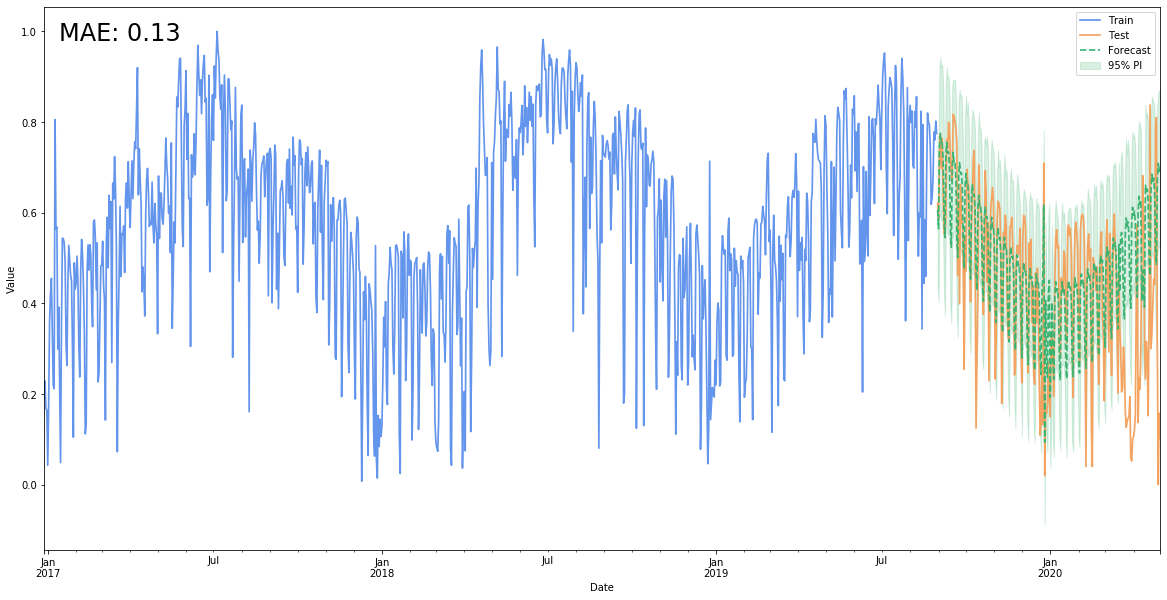

In [ ]:
  forecast = forecast.set_index('ds')
  err = np.round(mae(ts2_test_minmax['rentals'], forecast['yhat']), 2)

  fig, ax = plt.subplots(1, figsize = (20, 10))

  ts2_train_minmax['rentals'].plot(ax = ax, color = 'cornflowerblue', label = 'Train', linewidth = 1.7)
  ts2_test_minmax['rentals'].plot(ax = ax, color = 'sandybrown', label = 'Test', linewidth = 1.7)
  forecast['yhat'].plot(ax = ax, color = 'mediumseagreen', linestyle = 'dashed', label = 'Forecast', linewidth = 1.7)
  ax.fill_between(forecast.index, forecast.yhat_lower, forecast.yhat_upper, color='mediumseagreen', alpha=.2, label = '95% PI')

  ax.set(title = '', xlabel = 'Date', ylabel = 'Value')
  ax.text(0.013, 0.95, f'MAE: {err}', fontsize = 24, horizontalalignment='left', verticalalignment='center', transform = ax.transAxes)

  plt.legend()
  plt.show()

## Бонус. Напишите свою модель на STAN (3 балла).

Разработайте и испытай свою модель для месячного ряда в STAN.

Сравните качество прогнозов с наивной сезонной на тестовой выборке с помощью MAE. 



In [ ]:
# ваш код модели на STAN и её обучения моделей здесь

In [ ]:
# посчитайте метрики на test

In [ ]:
# нарисуйте пресказания